In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np


In [29]:
df=pd.read_csv('data_cleaned.csv')

In [30]:
df.head()

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.0,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.0,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.0,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.0,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1


# Segragating Variables independent and dependent

In [31]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
x.shape,y.shape

((891, 24), (891,))

# scaling the feature

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
std= StandardScaler()

In [34]:
x_scaled=std.fit_transform(x)

In [35]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=96,stratify=y)

In [36]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import f1_score

In [37]:
clf=KNN(n_neighbors=1)

In [38]:
clf.fit(train_x,train_y)
train_predict=clf.predict(train_x)
train_score=f1_score(train_predict,train_y)
print("Training Score = ",train_score)
test_predict=clf.predict(test_x)
test_score=f1_score(test_predict,test_y)
print("Test Score = ",test_score)

Training Score =  0.9747572815533979
Test Score =  0.6333333333333333


In [39]:
def f1score(K):
    train_f1=[]
    test_f1=[]
    for i in K:
        clf=KNN(n_neighbors=i)
        clf.fit(train_x,train_y)
        train_predict=clf.predict(train_x)
        temp=f1_score(train_predict,train_y)
        train_f1.append(temp)
        test_predict=clf.predict(test_x)
        temp1=f1_score(test_predict,test_y)
        test_f1.append(temp1)
        
        
    return train_f1,test_f1


        

In [40]:
K=range(1,150)


In [41]:
train_f1,test_f1=f1score(K)


In [42]:
value=pd.DataFrame({"train Score ":train_f1,"test_f1":test_f1},index=K)
value.head(20)

,train Score,test_f1
1,0.974757,0.633333
2,0.711779,0.524138
3,0.785425,0.633880
4,0.690307,0.560000
5,0.721868,0.627907
6,0.629108,0.585034
7,0.673640,0.621118
8,0.638009,0.597403
9,0.666667,0.615385
10,0.636569,0.562092


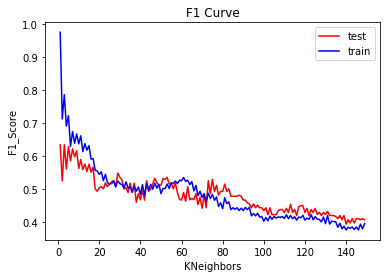

In [43]:
plt.plot(K,test_f1,color='red',label='test')
plt.plot(K,train_f1,color='blue',label='train')
plt.xlabel('KNeighbors')
plt.ylabel('F1_Score')
plt.title('F1 Curve')
#plt.ylim(0.4,1)
plt.legend()

In [53]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split( x,y,random_state=69,stratify=y)

In [54]:
K=range(1,150)
train,test=f1score(K)

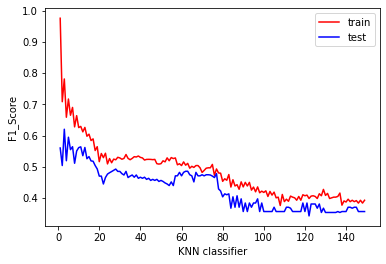

In [56]:
plt.plot(K,train,color='red',label='train')
plt.plot(K,test,color='blue',label='test')
plt.xlabel('KNN classifier')
plt.ylabel('F1_Score')
#plt.ylim(0.4,1)
plt.legend()